#### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [2]:
train = pd.read_csv('../data/train_to_model.csv')
test = pd.read_csv('../data/test_to_model.csv')

In [3]:
train.describe()

,Married,CoapplicantIncome,Loan_Status,EMI,EMI_exp,loan_avg,Long_Term_Loan,Medium_Term_Loan,Short_term_Loan,Credit_History_Bad,Rural,Semiurban,Urban,Male,Graduate,self_employed_No,self_employed_Unknown,1,2,3
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,4.290129,0.687296,15733.997337,2.547716,78134.975570,0.027687,0.083062,0.008143,0.166124,0.291531,0.379479,0.328990,0.817590,0.781759,0.814332,0.052117,0.166124,0.164495,0.083062
std,0.476373,3.875873,0.463973,9856.363082,1.008359,61391.397533,0.164209,0.276201,0.089945,0.372495,0.454838,0.485653,0.470229,0.386497,0.413389,0.389155,0.222445,0.372495,0.371027,0.276201
min,0.000000,0.000000,0.000000,900.000000,0.246030,4250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10117.500466,1.980634,42083.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.081125,1.000000,13050.000000,2.507289,62750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.739897,1.000000,18700.000000,3.016086,93500.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,10.637489,1.000000,78000.000022,9.098281,650000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
train.head()

,Loan_ID,Married,CoapplicantIncome,Loan_Status,EMI,EMI_exp,loan_avg,Long_Term_Loan,Medium_Term_Loan,Short_term_Loan,...,Rural,Semiurban,Urban,Male,Graduate,self_employed_No,self_employed_Unknown,1,2,3
0,LP001002,0,0.000000,1,13450.0,2.299538,134500.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,LP001003,1,7.319202,0,12800.0,2.101461,42666.666667,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,LP001005,1,0.000000,1,5940.0,1.980000,66000.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,LP001006,1,7.765993,1,12000.0,2.428658,60000.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,LP001008,0,0.000000,1,14100.0,2.350000,141000.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


#### Create data for modelling

- Drop id columne
- separate label and features in training data

In [5]:
train.drop('Loan_ID',axis = 1,inplace = True )

In [6]:
train_y = train.Loan_Status
train= train.drop('Loan_Status',axis = 1,inplace = False )

test_id = test.Loan_ID
test.drop('Loan_ID',axis = 1,inplace = True )

#### Scaling features

In [7]:
from sklearn.preprocessing import MinMaxScaler

train = pd.DataFrame(MinMaxScaler().fit_transform(train),columns = train.columns)
test = pd.DataFrame(MinMaxScaler().fit_transform(test),columns = test.columns)

In [8]:
import pickle

pickle.dump(MinMaxScaler().fit(train), open('../models/scaler.pkl', 'wb')) 

In [9]:
train.describe()

,Married,CoapplicantIncome,EMI,EMI_exp,loan_avg,Long_Term_Loan,Medium_Term_Loan,Short_term_Loan,Credit_History_Bad,Rural,Semiurban,Urban,Male,Graduate,self_employed_No,self_employed_Unknown,1,2,3
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.403303,0.192399,0.260011,0.114417,0.027687,0.083062,0.008143,0.166124,0.291531,0.379479,0.328990,0.817590,0.781759,0.814332,0.052117,0.166124,0.164495,0.083062
std,0.476373,0.364360,0.127839,0.113910,0.095070,0.164209,0.276201,0.089945,0.372495,0.454838,0.485653,0.470229,0.386497,0.413389,0.389155,0.222445,0.372495,0.371027,0.276201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.119553,0.195951,0.058588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.665676,0.157588,0.255445,0.090592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727606,0.230869,0.312921,0.138211,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting the training data into train and validation sets

maintain a 75:25 split

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,train_y,test_size=0.25,random_state=42)

#### Defining Accuracy functions

In [11]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

def accuracy_cal(act,pred):
    print('confusion matrix: ',confusion_matrix(act,pred))
    print('Accuracy Score: ',accuracy_score(act,pred))
    print('F1 Score: ',f1_score(act,pred))
    print('Recall Score: ',recall_score(act,pred))
    print('Precision Score: ',precision_score(act,pred))

In [12]:
## Used in below models to visualize the precision recall tradeoff and auc score and roc curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.legend()
    plt.xlabel('Threshold')
    plt.show()

def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Posiitve Rate")
    plt.show()

def plot_prt_roc(tr,scores):
    precisions,recalls,thresholds = precision_recall_curve(tr,scores)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, threshold = roc_curve(tr,scores)
    plot_roc_curve(fpr,tpr)
    plt.show()  

#### Load model libraries

In [13]:
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#### Trying a bunch of classifiers using cross validation

In [14]:
models = {'SGDClassifier':SGDClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'LogisticRegression': LogisticRegression(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'XGBClassifier':XGBClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'HistGradientBoostingClassifier':HistGradientBoostingClassifier(),
          'SVC': SVC()
         }


def Fit_Score(models, X_train, y_train, X_test, y_test, train, train_y):
    np.random.seed(77)
    model_scores = {}
    for name, model in models.items():
        print(name)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        model_scores[name] = {"cv_acc": np.mean(cross_val_score(model, train, train_y, cv=5, scoring="accuracy")),
                              "confusion matrix": confusion_matrix(y_test,y_pred),
                              "Accuracy Score": accuracy_score(y_test,y_pred),
                              "F1 Score": f1_score(y_test,y_pred),
                              "Recall Score": recall_score(y_test,y_pred),
                              "Precision Score": precision_score(y_test,y_pred)}
    return model_scores

In [15]:
Scores = Fit_Score(models=models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test,train=train,train_y=train_y)
pd.DataFrame(Scores.values(), Scores.keys())

SGDClassifier
RandomForestClassifier
DecisionTreeClassifier
LogisticRegression
AdaBoostClassifier
XGBClassifier
[10:59:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remov

[10:59:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:59:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:59:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:59:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:59:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GradientBoostingClassifier
HistGradientBoostingClassifier
SVC


,cv_acc,confusion matrix,Accuracy Score,F1 Score,Recall Score,Precision Score
SGDClassifier,0.757417,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000
RandomForestClassifier,0.825776,"[[31, 23], [6, 94]]",0.811688,0.866359,0.94,0.803419
DecisionTreeClassifier,0.701933,"[[32, 22], [26, 74]]",0.688312,0.755102,0.74,0.770833
LogisticRegression,0.829028,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000
AdaBoostClassifier,0.806238,"[[30, 24], [11, 89]]",0.772727,0.835681,0.89,0.787611
XGBClassifier,0.786605,"[[35, 19], [12, 88]]",0.798701,0.850242,0.88,0.822430
GradientBoostingClassifier,0.806171,"[[32, 22], [8, 92]]",0.805195,0.859813,0.92,0.807018
HistGradientBoostingClassifier,0.806198,"[[32, 22], [11, 89]]",0.785714,0.843602,0.89,0.801802
SVC,0.830654,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000


#### Pick top 5 algorithm for hypertuning and ensemble based on f1 snd recall
- SVC
- gradient boosting classifier
- SGD Classifier
- logistic
- random forest

In [21]:
pd.DataFrame(Scores.values(), Scores.keys()).sort_values('Accuracy Score',ascending=False)

,cv_acc,confusion matrix,Accuracy Score,F1 Score,Recall Score,Precision Score
SGDClassifier,0.757417,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000
RandomForestClassifier,0.825776,"[[31, 23], [6, 94]]",0.811688,0.866359,0.94,0.803419
LogisticRegression,0.829028,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000
SVC,0.830654,"[[27, 27], [2, 98]]",0.811688,0.871111,0.98,0.784000
GradientBoostingClassifier,0.806171,"[[32, 22], [8, 92]]",0.805195,0.859813,0.92,0.807018
XGBClassifier,0.786605,"[[35, 19], [12, 88]]",0.798701,0.850242,0.88,0.822430
HistGradientBoostingClassifier,0.806198,"[[32, 22], [11, 89]]",0.785714,0.843602,0.89,0.801802
AdaBoostClassifier,0.806238,"[[30, 24], [11, 89]]",0.772727,0.835681,0.89,0.787611
DecisionTreeClassifier,0.701933,"[[32, 22], [26, 74]]",0.688312,0.755102,0.74,0.770833


In [22]:
models = {'RandomForestClassifier': RandomForestClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SGDClassifier':SGDClassifier(),
          'GradientBoostingClassifier':GradientBoostingClassifier(),
          'SVC': SVC()
         }

#### Tuning these top 5 models using gridsearchcv

In [56]:
from sklearn.model_selection import GridSearchCV
import pickle

In [24]:
def gridsearch_fit(name, classifier, params):
    grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv=5,
                           n_jobs=1,
                           verbose=True, refit=True)
    grid_search.fit(X_train, y_train)
    pickle.dump(grid_search, open(''.join(['../models/',name,'_gridsearch_1.pkl']), 'wb')) 
    best_parameters = grid_search.best_params_
    best_accuracy = grid_search.best_score_
    print(best_parameters)
    print(best_accuracy)   

#### Tuning Random Forest Classifier 

Improves from 81% to 84%

In [25]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
##grid search on random forest
n_est = [100,200,300,400,600,800,1000,1500]
params = {"n_estimators": n_est,
       "max_depth": [5, 10],
       "min_samples_split": [10,12],
       "min_samples_leaf": [2, 5, 12]}


classifier = RandomForestClassifier()
gridsearch_fit(name= 'RandomForestClassifier', classifier = classifier, params = params) 

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 100}
0.8434782608695652


#### Tuning Logistic Regression Classifier 

Improves from 81% to 84%

In [29]:
##grid search on logistic regresson
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [30]:
params = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

classifier = LogisticRegression()
gridsearch_fit(name= 'LogisticRegression', classifier = classifier, params = params) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'solver': 'newton-cg'}
0.8347826086956524


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/

#### Tuning SGD Classifier 

Improves from 81% to 83.6%

In [31]:
##grid search on ada boost classifier
SGDClassifier().get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [43]:
params = {"alpha" : [0.001, 0.01, 0.1, 1, 10],
          "warm_start" : ['True','False'],
          "loss":['hinge',  'squared_hinge','squared_error'],
          "max_iter": [500,1000],
          "penalty": ['l1','l2']}

classifier = SGDClassifier(early_stopping=True)
gridsearch_fit(name= 'SGDClassifier', classifier = classifier, params = params) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'alpha': 0.01, 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l1', 'warm_start': 'True'}
0.8369565217391305


#### Tuning Gradient Boosting Classifier 

Improves from 81% to 85%

In [44]:
GradientBoostingClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [45]:
##grid search on gradient boosting classifier
n_est = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [8,12],
    "min_samples_leaf": [2,5],
    "max_depth":[10,12],
    "n_estimators":[200,400,600,800,100]
    }

classifier = GradientBoostingClassifier()
gridsearch_fit(name= 'GradientBoostingClassifier', classifier = classifier, params = params) 

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}
0.8456521739130436


#### Tuning Support Vector Classifier 

Improves from 81% to 83.7%

In [46]:
##grid search on SVC
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [50]:
##grid search on gradient boosting classifier
params = {'C': [0.1,0.5,0.6,1], 'gamma': [1,0.1,0.2,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

classifier = SVC()
gridsearch_fit(name= 'SVC', classifier = classifier, params = params) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8369565217391305


#### Predicting on the validation data 

In [62]:
models = ['RandomForestClassifier','LogisticRegression','SGDClassifier','GradientBoostingClassifier','SVC']
final = pd.DataFrame({'y_final':y_test}).reset_index()

for name in models:
    model = pickle.load(open(''.join(['../models/',name,'_gridsearch_1.pkl']),'rb'))
    y_pred = model.predict(X_test)
    temp = pd.DataFrame({'Actual':y_test,name:y_pred}).reset_index()
    print(name)
    accuracy_cal(temp['Actual'],temp[name])
    print('-----------------------------------------------------')
    #print(temp.head())
    final = pd.merge(final,temp[[name]],how = 'left',left_index = True, right_index = True)
    #print(final.head())

RandomForestClassifier
confusion matrix:  [[30 24]
 [ 4 96]]
Accuracy Score:  0.8181818181818182
F1 Score:  0.8727272727272728
Recall Score:  0.96
Precision Score:  0.8
-----------------------------------------------------
LogisticRegression
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111111111111
Recall Score:  0.98
Precision Score:  0.784
-----------------------------------------------------
SGDClassifier
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111111111111
Recall Score:  0.98
Precision Score:  0.784
-----------------------------------------------------
GradientBoostingClassifier
confusion matrix:  [[31 23]
 [ 6 94]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8663594470046083
Recall Score:  0.94
Precision Score:  0.8034188034188035
-----------------------------------------------------
SVC
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111

In [63]:
final.head()

,index,y_final,RandomForestClassifier,LogisticRegression,SGDClassifier,GradientBoostingClassifier,SVC
0,350,1,1,1,1,1,1
1,377,1,1,1,1,1,1
2,163,1,1,1,1,1,1
3,609,1,1,1,1,1,1
4,132,1,1,1,1,1,1


#### Creating Ensemble models on top of the 5 classifiers

In [73]:
##hard voting 
from statistics import mode
final['HardVoting_5'] = final.apply(lambda x: mode(x[2:6]), axis=1)

In [74]:
final['HardVoting_4'] = final.apply(lambda x: int(mode(x[i] for i in [2,3,5,6])), axis=1)

In [75]:
final['HardVoting_3'] = final.apply(lambda x: int(mode(x[i] for i in [2,3,4])), axis=1)

In [76]:
final.head()

,index,y_final,RandomForestClassifier,LogisticRegression,SGDClassifier,GradientBoostingClassifier,SVC,HardVoting_5,HardVoting_4,HardVoting_3
0,350,1,1,1,1,1,1,1,1,1
1,377,1,1,1,1,1,1,1,1,1
2,163,1,1,1,1,1,1,1,1,1
3,609,1,1,1,1,1,1,1,1,1
4,132,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

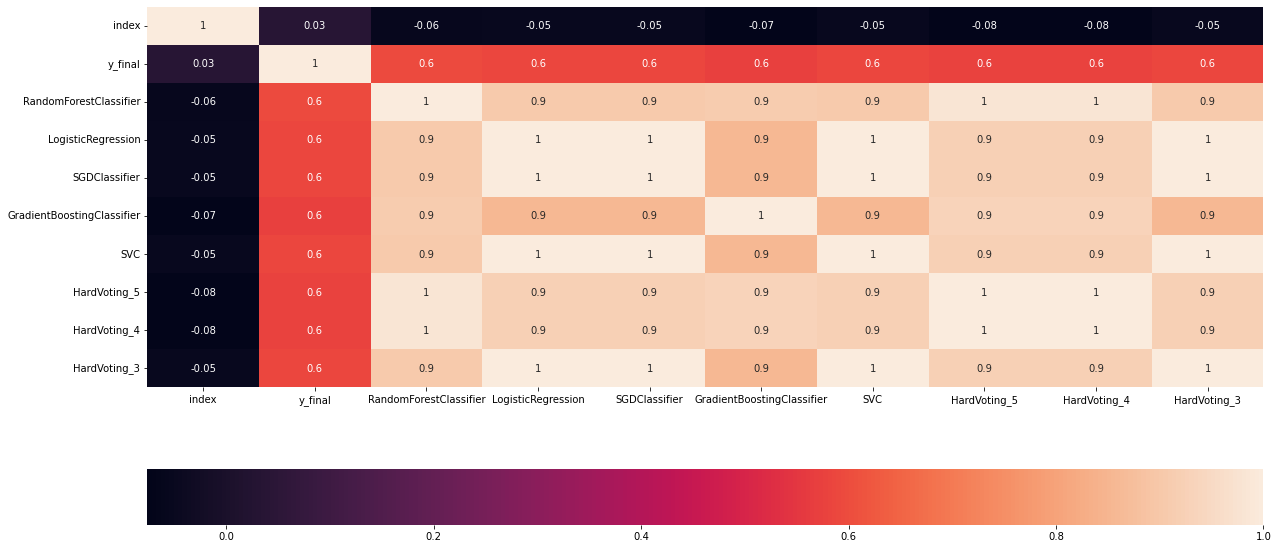

In [77]:
plt.figure(figsize = (20,10))
sns.heatmap(final.corr(), annot = True,fmt='.1g', cbar_kws= {'orientation': 'horizontal'} )

In [122]:
cols1 = ['y_final','HardVoting_5','HardVoting_4','HardVoting_3','index']
cols2 = ['y_final','index']
cols3 = ['index','y_final','HardVoting_5']
cols4 = ['index','y_final','HardVoting_5','HardVoting_4','HardVoting_3','GradientBoostingClassifier','SVC']
cols5 = ['index','y_final','HardVoting_5','HardVoting_4','HardVoting_3','SGDClassifier','GradientBoostingClassifier','SVC']
cols6 = ['index','y_final','SGDClassifier','GradientBoostingClassifier','SVC']
cols7 = ['index','y_final','SGDClassifier','GradientBoostingClassifier','SVC','RandomForestClassifier','LogisticRegression']

##cols2
#{'solver': 'newton-cg'}
#0.8049462365591398

##cols1
#{'solver': 'liblinear'}
#0.8113978494623655

##cols4
#{'solver': 'newton-cg'}
#00.8178494623655913


#### Creating ML based ensemble score on top of 5 classifiers

In [131]:
y = final.y_final
x = final.drop(cols4,axis = 1, inplace = False)

In [132]:
params = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.0001,0.00001]}]

classifier = LogisticRegression()

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv=5,
                           n_jobs=1,
                           verbose=True, refit=True)
grid_search.fit(x, y)
pickle.dump(grid_search, open(''.join(['../models/','LogisticRegression','_gridsearch_2.pkl']), 'wb')) 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)   


Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'penalty': 'none'}
0.8178494623655913


/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/apurvasij/anaconda3/envs/loan_pred/lib/python3.9/

In [133]:

n_est = [100,200,500,700,1000]
params = {"n_estimators": n_est,
       "max_depth": [5, 10],
       "min_samples_split": [10,12],
       "min_samples_leaf": [2, 5, 12]}


classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           cv=5,
                           n_jobs=1,
                           verbose=True, refit=True)
grid_search.fit(x, y)
pickle.dump(grid_search, open(''.join(['../models/','RandomForestClassifier','_gridsearch_2.pkl']), 'wb')) 
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_parameters)
print(best_accuracy)   


Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
0.8113978494623655


#### Comparing final accuracies

In [136]:
for i in range(2,9):
    print(final.columns[i])
    accuracy_cal(final[final.columns[1]],final[final.columns[i]])
    print('-----------------------------------------------------')

RandomForestClassifier
confusion matrix:  [[30 24]
 [ 4 96]]
Accuracy Score:  0.8181818181818182
F1 Score:  0.8727272727272728
Recall Score:  0.96
Precision Score:  0.8
-----------------------------------------------------
LogisticRegression
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111111111111
Recall Score:  0.98
Precision Score:  0.784
-----------------------------------------------------
SGDClassifier
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111111111111
Recall Score:  0.98
Precision Score:  0.784
-----------------------------------------------------
GradientBoostingClassifier
confusion matrix:  [[31 23]
 [ 6 94]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8663594470046083
Recall Score:  0.94
Precision Score:  0.8034188034188035
-----------------------------------------------------
SVC
confusion matrix:  [[27 27]
 [ 2 98]]
Accuracy Score:  0.8116883116883117
F1 Score:  0.8711111

They all perform similarly on the validation dataset - this might be due to less number of dataset to be trained on.


#### Predicting values for the final test file and creating individual files

In [150]:
models = ['RandomForestClassifier','LogisticRegression','SGDClassifier','GradientBoostingClassifier','SVC']
final = pd.DataFrame({'Loan_ID':test_id})

for name in models:
    model = pickle.load(open(''.join(['../models/',name,'_gridsearch_1.pkl']),'rb'))
    y_pred = model.predict(test)
    temp = pd.DataFrame({'Loan_ID':test_id,name:y_pred}).reset_index()
    final = pd.merge(final,temp[[name]],how = 'left',left_index = True, right_index = True)
    print(name)
    
final['HardVoting_5'] = final.apply(lambda x: mode(x[1:5]), axis=1)
final['HardVoting_4'] = final.apply(lambda x: int(mode(x[i] for i in [1,2,4,5])), axis=1)
final['HardVoting_3'] = final.apply(lambda x: int(mode(x[i] for i in [1,2,3])), axis=1)
final['HardVoting_3_1'] = final.apply(lambda x: int(mode(x[i] for i in [2,3,4])), axis=1)
final['HardVoting_2'] = final.apply(lambda x: int(max(x[i] for i in [2,4])), axis=1)

models = ['RandomForestClassifier','LogisticRegression']
cols4 = ['Loan_ID','HardVoting_5','HardVoting_4','HardVoting_3','GradientBoostingClassifier','SVC','HardVoting_3_1','HardVoting_2']

x = final.drop(cols4,axis = 1, inplace = False)
for name in models:
    model = pickle.load(open(''.join(['../models/',name,'_gridsearch_2.pkl']),'rb'))
    y_pred = model.predict(x)
    temp = pd.DataFrame({'Loan_ID':test_id,''.join([name,'_ens']):y_pred}).reset_index()
    final = pd.merge(final,temp[[''.join([name,'_ens'])]],how = 'left',left_index = True, right_index = True)

RandomForestClassifier
LogisticRegression
SGDClassifier
GradientBoostingClassifier
SVC


In [151]:
final.head()

,Loan_ID,RandomForestClassifier,LogisticRegression,SGDClassifier,GradientBoostingClassifier,SVC,HardVoting_5,HardVoting_4,HardVoting_3,HardVoting_3_1,HardVoting_2,RandomForestClassifier_ens,LogisticRegression_ens
0,LP001015,1,1,1,1,1,1,1,1,1,1,1,1
1,LP001022,1,1,1,1,1,1,1,1,1,1,1,1
2,LP001031,1,1,1,1,1,1,1,1,1,1,1,1
3,LP001035,1,1,1,1,1,1,1,1,1,1,1,1
4,LP001051,1,1,1,1,1,1,1,1,1,1,1,1


#### Recode the loan status to Y and N for each file

In [152]:
for i in range(1,13):
    print(final.columns[i])
    submit = pd.DataFrame({'Loan_ID':final[final.columns[0]],'Loan_Status':final[final.columns[i]]})
    submit.Loan_Status = np.where(submit['Loan_Status'] == 1,'Y','N')
    submit.to_csv(''.join(["../submissions/",final.columns[i],"_iter3.csv"]),index = False)

RandomForestClassifier
LogisticRegression
SGDClassifier
GradientBoostingClassifier
SVC
HardVoting_5
HardVoting_4
HardVoting_3
HardVoting_3_1
HardVoting_2
RandomForestClassifier_ens
LogisticRegression_ens


#### Final Output on Public Leaderboard

- Gradient Boosting Classifier outperforms with 79.9 % accuracy
- Logistic Regression performs second best with 78.6% accuracy
- Rest other classifiers and ensemble models range between 77.7% - 78.1% accuracy
- Adaboost and DecisionTree perform worst with 61% accuracy

#### Final Ranking

- Rank 404/74541 (top 0.5%) on public leaderboard